<a href="https://colab.research.google.com/github/igquinteroch/deep-learning-coursework/blob/main/A3b_DL_TC5033_A01794419.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TC 5033
### Word Embeddings

<br>

#### Activity 3b: Text Classification using RNNs and AG_NEWS dataset in PyTorch
<br>

- Objective:
    - Understand the basics of Recurrent Neural Networks (RNNs) and their application in text classification.
    - Learn how to handle a real-world text dataset, AG_NEWS, in PyTorch.
    - Gain hands-on experience in defining, training, and evaluating a text classification model in PyTorch.
    
<br>

- Instructions:
    - Data Preparation: Starter code will be provided that loads the AG_NEWS dataset and prepares it for training. Do not modify this part. However, you should be sure to understand it, and comment it, the use of markdown cells is suggested.

    - Model Setup: A skeleton code for the RNN model class will be provided. Complete this class and use it to instantiate your model.

    - Implementing Accuracy Function: Write a function that takes model predictions and ground truth labels as input and returns the model's accuracy.

    - Training Function: Implement a function that performs training on the given model using the AG_NEWS dataset. Your model should achieve an accuracy of at least 80% to get full marks for this part.

    - Text Sampling: Write a function that takes a sample text as input and classifies it using your trained model.

    - Confusion Matrix: Implement a function to display the confusion matrix for your model on the test data.

    - Submission: Submit your completed Jupyter Notebook. Make sure to include a markdown cell at the beginning of the notebook that lists the names of all team members. Teams should consist of 3 to 4 members.
    
<br>

- Evaluation Criteria:

    - Correct setup of all the required libraries and modules (10%)
    - Code Quality (30%): Your code should be well-organized, clearly commented, and easy to follow. Use also markdown cells for clarity. Comments should be given for all the provided code, this will help you understand its functionality.
    
   - Functionality (60%):
        - All the functions should execute without errors and provide the expected outputs.
        - RNN model class (20%)
        - Accuracy fucntion (10%)
        - Training function (10%)
        - Sampling function (10%)
        - Confucion matrix (10%)

        - The model should achieve at least an 80% accuracy on the AG_NEWS test set for full marks in this criterion.


Dataset

https://pytorch.org/text/stable/datasets.html#text-classification

https://paperswithcode.com/dataset/ag-news


#### Install libraries (if needed)

You may need to install the following libraries to ensure version compatibility. After installing them, please Restart the Session (Runtime -> Restart Session)

In [ ]:
!pip install torch==2.0.1 torchvision==0.15.2 torchaudio==2.0.2 torchtext==0.15.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 62.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 65.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 53.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/1

In [ ]:
!pip install scipy==1.9.3
!pip install scikit-plot
#you may receive a message of restarting session, this is OK

In [ ]:
!pip install portalocker
#please restar session after this intallation. After restarting go straight to importing the libraries

## Import libraries

In [ ]:
import numpy as np

#PyTorch libraries
import torch
from torchtext.datasets import AG_NEWS

# Dataloader library
from torch.utils.data import DataLoader
from torch.utils.data.dataset import random_split

# Libraries to prepare the data
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
from torchtext.data.functional import to_map_style_dataset

# Neural layers
from torch import nn
from torch.nn import functional as F

# To plot confusion matrix

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


### Get the train and the test datasets and dataloaders

Classes:

* 1 - World

* 2 - Sports

* 3 - Business

* 4 - Sci/Tech

We will convert them to:

* 0 - World

* 1 - Sports

* 2 - Business

* 3 - Sci/Tech

Load the dataset (AG_NEWS) that we will be using for the text classifier and transform it to map style to be able to handle the data as a map.

In [ ]:
train_dataset, test_dataset = AG_NEWS()
train_dataset, test_dataset = to_map_style_dataset(train_dataset), to_map_style_dataset(test_dataset)

In [ ]:
# Get the tokeniser
# tokeniser object
tokeniser = get_tokenizer('basic_english')

def yield_tokens(data):
    for _, text in data:
        yield tokeniser(text)

In [ ]:
# Build the vocabulary
vocab = build_vocab_from_iterator(yield_tokens(train_dataset), specials=["<unk>"])
#set unknown token at position 0
vocab.set_default_index(vocab["<unk>"])

In [ ]:
#test tokens
tokens = tokeniser('Welcome to TC5033')
print(tokens, vocab(tokens))

['welcome', 'to', 'tc5033'] [3314, 4, 0]


In [ ]:
NUM_TRAIN = int(len(train_dataset)*0.9) # Variable that indicates the size that the test dataset should be set to
NUM_VAL = len(train_dataset) - NUM_TRAIN # Variable that indicates the size that the val dataset should be set to

In [ ]:
# The dataset is split into the respective sizes established in the previous code cell
train_dataset, val_dataset = random_split(train_dataset, [NUM_TRAIN, NUM_VAL])

In [ ]:
# Print the number of elements within the train, validation, and test datasets
print(len(train_dataset), len(val_dataset), len(test_dataset))

108000 12000 7600


In [ ]:
# function passed to the DataLoader to process a batch of data as indicated
def collate_batch(batch):
    # Get label and text
    y, x = list(zip(*batch))

    # Create list with indices from tokeniser
    x = [vocab(tokeniser(text)) for text in x]
    x = [t + ([0]*(max_tokens - len(t))) if len(t) < max_tokens else t[:max_tokens] for t in x]

    # Prepare the labels, by subtracting 1 to get them in the range 0-3
    return torch.tensor(x, dtype=torch.int32), torch.tensor(y, dtype=torch.int32) - 1

In [ ]:
labels =  ["World", "Sports", "Business", "Sci/Tech"]
max_tokens = 50
BATCH_SIZE = 256

In this section the train, validation, and test data loader are created to be used in the subsequent sections of this implementation.

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, collate_fn=collate_batch, shuffle = True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, collate_fn=collate_batch, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, collate_fn=collate_batch, shuffle = True)

### Let us build our RNN model

This section defines the `RNN_Model_1 class`, which implements a Recurrent Neural Network (RNN) model specifically designed for text classification. The model consists of three main components:

* Embedding Layer: Converts words into numerical vector representations.
* RNN Layer: Processes the sequence of word embeddings, capturing contextual information.
* Fully Connected Layer: Produces the final classification predictions.

Four  variables are considered: `EMBEDDING SIZE` (the size of the embedding), `NEURONS` (the number of neurons), `LAYERS`, the layers of the model, and `NUM_CLASSES`, which are the number of classes at the output.

The model takes a batch of text sequences as input and outputs predictions indicating the likelihood of each text belonging to different predefined categories.

In [ ]:
EMBEDDING_SIZE = 64
NEURONS = 12
LAYERS = 2
NUM_CLASSES = 4

In [ ]:
class RNN_Model_1(nn.Module):
    def __init__(self, embed_size, hidden, layers, num_classes):
        super().__init__()
        self.embedding_layer = nn.Embedding(num_embeddings=len(vocab),
                                            embedding_dim=embed_size)

        self.rnn = torch.nn.RNN(embed_size,hidden, layers, batch_first=True) # complete this code/
                        # You may use PyTorch nn.GRU(), nn.RNN(), or nn.LSTM()

        self.fc = nn.Linear(hidden, num_classes) # complete output classifier layer using linear layer

    def forward(self, x):

        # The forward include each component of the init RNN
        batch_size = x.size(0)
        x = self.embedding_layer(x)
        x,h = self.rnn(x)
        return self.fc(x.mean(dim=1))
        # implement forward pass. This function will be called when executing the mode

The following function, `accuracy`, evaluates the performance of the trained machine learning model by taking a model and a data loader as input, runs the model on the data, compares the predictions to the true labels, and returns the overall accuracy of the model on that data.

In [ ]:
def accuracy(model, loader):
  num_correct = 0
  num_total = 0
  model.eval()
  model = model.to(device=device)
  with torch.no_grad():
      for xi, yi in loader:
          xi = xi.to(device=device, dtype = torch.long)
          yi = yi.to(device=device, dtype = torch.long)
          scores = model(xi)
          _, pred = scores.max(dim=1)
          num_correct += (pred == yi).sum()
          num_total += pred.size(0)

      return float(num_correct)/num_total

The following function, `train`, is responsible for the training loop, iteratively feeding data to the model, calculating the loss, updating the model's parameters, and tracking its performance on validation data.

In [ ]:
def train(model, optimiser, epochs=100):
  model = model.to(device=device)
  for epoch in range(epochs):
      for i, (xi, yi) in enumerate(train_loader):
        model.train()
        xi = xi.to(device=device, dtype=torch.long)
        yi = yi.to(device=device, dtype=torch.long)
        scores = model(xi)
        cost = F.cross_entropy(input= scores, target=yi)
        optimiser.zero_grad()
        cost.backward()

        optimiser.step()
      acc= accuracy(model, val_loader)
      print(f'Epoch:{epoch} | Cost: {cost.item()} | Accuracy:{acc}')

In [ ]:
# Hyperparameters
epochs = 10
lr = 0.01

# instantiate model
rnn_model = RNN_Model_1(EMBEDDING_SIZE, NEURONS, LAYERS, NUM_CLASSES)
optimiser = torch.optim.Adam(rnn_model.parameters(), lr=lr)

In [ ]:
train(rnn_model, optimiser=optimiser,  epochs=epochs)

Epoch:0 | Cost: 0.3170633614063263 | Accuracy:0.8828333333333334
Epoch:1 | Cost: 0.2804374396800995 | Accuracy:0.8938333333333334
Epoch:2 | Cost: 0.21239720284938812 | Accuracy:0.8955833333333333
Epoch:3 | Cost: 0.23358656466007233 | Accuracy:0.8909166666666667
Epoch:4 | Cost: 0.17501845955848694 | Accuracy:0.8925
Epoch:5 | Cost: 0.16344532370567322 | Accuracy:0.89025
Epoch:6 | Cost: 0.13354399800300598 | Accuracy:0.8898333333333334
Epoch:7 | Cost: 0.06864885985851288 | Accuracy:0.8898333333333334
Epoch:8 | Cost: 0.06613113731145859 | Accuracy:0.89
Epoch:9 | Cost: 0.14228244125843048 | Accuracy:0.89225


In [ ]:
print(f'{accuracy(rnn_model, test_loader):.4f}')

0.8854


In [ ]:
def sample_text(model, text):
    """Classifies a sample text using the trained RNN model.

    Parameters:
        model (RNN_Model_1): The trained RNN model.
        text (str): The sample text to classify.
    """
    # Evaluation mode
    model.eval()

    # Move model to the correct device
    model = model.to(device=device)

    # Tokenize the input text
    tokens = tokeniser(text)

    # Convert tokens to indices using the vocabulary
    indexed_tokens = vocab(tokens)

    # Pad or truncate the token sequence to match the model's input size
    indexed_tokens = indexed_tokens[:max_tokens] + [0] * (max_tokens - len(indexed_tokens))

    # Convert the token indices to a PyTorch tensor
    input_tensor = torch.tensor(indexed_tokens, dtype=torch.int32).unsqueeze(0).to(device=device)

    # Make predictions
    with torch.no_grad():
        output = model(input_tensor)
        _, predicted_label_index = torch.max(output, 1)

    # Get the predicted label
    predicted_label = labels[predicted_label_index.item()]

    return predicted_label

In [ ]:
sample_text_to_classify = "From smartphones to artificial intelligence, technological advancements have transformed nearly every aspect of society, bringing both unprecedented opportunities and complex challenges."
predicted_label = sample_text(rnn_model, sample_text_to_classify)
print(f"Predicted Label: {predicted_label}")

Predicted Label: Sci/Tech


In [ ]:
# create confusion matrix
# Function to plot confusion matrix
def plot_confusion_matrix(model, loader):
    all_preds = []
    all_labels = []
    model.eval()
    with torch.no_grad():
        for xi, yi in loader:
            xi = xi.to(device=device, dtype=torch.long)
            yi = yi.to(device=device, dtype=torch.long)
            scores = model(xi)
            _, preds = scores.max(dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(yi.cpu().numpy())

    cmatrix = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cmatrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

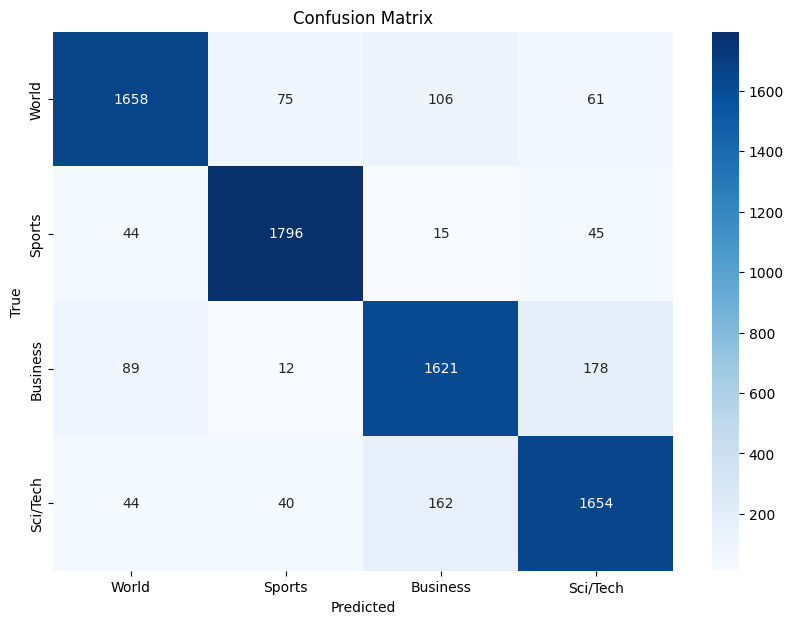

In [ ]:
# Call the plot_confusion_matrix with our RNN model and the test dataloader to print it's confusion matrix.
plot_confusion_matrix(rnn_model, test_loader)

### Conclusions

Analyzing the confusion matrix given, we can observe that the three most common mistakes made by the model are the next ones:


*   5.46% of the texts from the World class are predicted to be part of the Business class.
*   9.26% of the texts from the Business class are predicted to be part of the Sci/Tech class.
*   9.21% of the texts from the Sci/Tech class are predicted to be part of the Business class.

Generally, we can perceive that the class that maintains the higher percentage of accuracy when it comes to it's predictions is the sports class with 95%. On the other hand, it can be noticed that the percentage in which the model
incorrectly predicts that a text is part of the Business class instead of the Sci/Tech class is almost identical to the cases in which it incorrectly predicts that a text is part of the Sci/Tech class instead of the Business class.